In [1]:
import ipywidgets as widgets
import utils
import os
from importlib import reload

reload(utils)

<module 'utils' from 'c:\\github\\dog_brain_toolkit\\utils.py'>

In [7]:
username = "raulh87"
datafolder = r"P:\userdata" + username + r"\data"
datafolder = '/home' + '/' + username + '/mnt/a471/userdata/' + username + '/data'
datafolder



'/home/raulh87/mnt/a471/userdata/raulh87/data'

In [19]:
import utils
import preprocess_functions
from importlib import reload
import os

In [41]:
reload(utils)
reload(preprocess_functions)
dataset = 'Complex'
session = ''
task = 'visual' 
specie= 'D'
username='raulh87'
# check if the system is windows
if os.name == 'nt':
    #datafolder = r"C:\data"
    datafolder = r"P:\userdata" + os.sep + username + r"\data"
else:
    datafolder = '/home' + os.sep + username + '/mnt/a471/userdata/' + username + '/data'
sub_N = 1
run_N = 1
smooth=0
combination=['-x','z','-y']


preprocess_functions.preprocess_run(sub_N, run_N, dataset, task, specie, datafolder, session, smooth, combination)


This is a test, no actual fslinfo command will be run, giving back random values
Output design file: c:\github\dog_brain_toolkit\FSL_designs\preprocess_modified.fsf
./feat c:\github\dog_brain_toolkit\FSL_designs\preprocess_modified.fsf
system is windows, command not executed.
FSL output directory: P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001_task-visual_run-01
system is windows, command not executed.
orientation to use:  ['-x', 'z', '-y']
non-oriented file: P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_run-01_not-oriented.nii.gz
oriented file: P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_run-01_reoriented.nii.gz
The system is windows, this is a test, no actual fsl commands will be run
Working with P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_run-01_not-oriented.nii.gz
Creating P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_run-01_reoriented.ni

In [21]:
combination=['-x','z','-y']
# indicate what combination it is
print('Combination:', combination)

Combination: ['-x', 'z', '-y']


In [ ]:
combination = ['-x','-y','-z'] # voice_sens
combination = ['-x','z','-y'] # prosody, complex, actions
utils.reorient_file(workingdir + os.sep + non_oriented_file, workingdir + os.sep + reoriented_file, combination)


## Calculating mean_fct

In [10]:
import preprocess_functions

In [46]:
reload(utils)
reload(preprocess_functions)
dataset = 'Complex'
session = ''
task = 'visual' 
specie= 'D'
username='raulh87'
# check if the system is windows
if os.name == 'nt':
    #datafolder = r"C:\data"
    datafolder = r"P:\userdata" + os.sep + username + r"\data"
else:
    datafolder = '/home' + os.sep + username + '/mnt/a471/userdata/' + username + '/data'
sub_N = 1
run_N = 1

# This function will be called get_mean_fct

#print(base_filename)
first_time = True # flag to create the base volume, True = get the volume, False = do not get the volume it's already created
runs_to_use = [1,2,3,4]
base_run = 1 # run used as reference to align all the others

preprocess_functions.get_mean_fct(sub_N, runs_to_use, base_run, dataset, task, specie, datafolder, session, first_time)


The system is Windows, this is a test, no actual system or FSL commands will be run
processing 1 of 4
calculating motion...
mcflirt -in P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001\D-sub-001_task-visual_run-01_reoriented.nii.gz -out P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001\D-sub-001_task-visual_run-01_reoriented_mc_tmp.nii.gz -plots
par file saved as: P:\userdata\raulh87\data\Complex\movement\D-sub-001_task-visual_run-01.par
correcting motion...
mcflirt -in P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001\D-sub-001_task-visual_run-01_reoriented.nii.gz -out P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001\D-sub-001_task-visual_run-01_reoriented_mc.nii.gz -reffile P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001\base_vol.nii.gz
motion corrected file saved as D-sub-001_task-visual_run-01_reoriented_mc.nii.gz
removing temporal file: P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\

# Cutting app

In [2]:
from nilearn.plotting import plot_anat, show
import ipywidgets as widgets
import utils
import os
from importlib import reload
from nilearn import plotting
from nilearn import image as nli
reload(utils)
import nibabel as nib
import numpy as np
from ipywidgets import HBox, VBox
import numpy as np
from nilearn.plotting import plot_anat, show
import ipywidgets as widgets
import matplotlib.pyplot as plt

#plot_anat(mean_fct_file, display_mode='ortho', cut_coords=[x,y,z])


In [12]:
def plot_slices(x, y, z, x_lim1, y_lim1, z_lim1, x_lim2, y_lim2, z_lim2):
    
    """
    Plot slices from the sagittal, coronal, and axial views side by side.
    """
    fig, axes = plt.subplots(1, 3, figsize=(8, 5))

    # Sagittal
    sagittal_slice = data[x, :, :]
    axes[0].imshow(sagittal_slice.T, cmap='gray', origin='lower')
    axes[0].axis('off')

    # Coronal
    coronal_slice = data[:, y, :]
    axes[1].imshow(coronal_slice.T, cmap='gray', origin='lower')
    axes[1].axis('off')

    # Axial
    axial_slice = data[:, :, z]
    axes[2].imshow(axial_slice.T, cmap='gray', origin='lower')
    axes[2].axis('off')

    # make a tight layout
    plt.tight_layout()

    # make the background black
    fig.patch.set_facecolor('black')

    
    # Plotting red lines
    # plotting lines in sagital slice
    axes[0].axhline(y=z_lim1, color='red', lw=2)
    axes[0].axvline(x=y_lim1, color='red', lw=2)

    # plotting lines in coronal slice
    axes[1].axvline(x=x_lim1, color='red', lw=2)
    axes[1].axhline(y=z_lim1, color='red', lw=2)
    
    # plotting lines in axial slice
    axes[2].axvline(x=x_lim1, color='red', lw=2)
    axes[2].axhline(y=y_lim1, color='red', lw=2)

    # Plotting blue lines
    # plotting lines in sagital slice
    axes[0].axhline(y=z_lim2, color='blue', lw=2)
    axes[0].axvline(x=y_lim2, color='blue', lw=2)

    # plotting lines in coronal slice
    axes[1].axvline(x=x_lim2, color='blue', lw=2)
    axes[1].axhline(y=z_lim2, color='blue', lw=2)

    # plotting lines in axial slice
    axes[2].axvline(x=x_lim2, color='blue', lw=2)
    axes[2].axhline(y=y_lim2, color='blue', lw=2)

    plt.show()


def apply_cut_button(x_lim1, y_lim1, z_lim1, x_lim2, y_lim2, z_lim2):
    # determine name of params_file based on mean_fct_file
    params_file = mean_fct_file[:-7] + '_cut_params.txt'

    # create a dict with the cutting parameters
    param_dict = {'x_lim1':x_lim1, 'y_lim1':y_lim1,
                    'z_lim1':z_lim1, 'x_lim2':x_lim2,
                    'y_lim2':y_lim2, 'z_lim2':z_lim2, 
                    'output_file':cut_mean_fct_file,
                    }

    # save the cutting parameters
    utils.write_params_file(params_file, param_dict)
    print('button pressed')
    command = f"./remove_slices.sh {mean_fct_file} {params_file}"
    os.system(command)

    

dataset = 'Complex'
session = ''
task = 'visual'
specie= 'D'
sub_N = 1
# check if the system is windows
if os.name == 'nt':
    datafolder = r"C:\data"
    datafolder = r"P:\userdata\raulh87\data"
else:
    datafolder = '/home/raulh87/mnt/a471/userdata/raulh87/data'

# working directory
workingdir = datafolder + os.sep + dataset + os.sep + 'preprocessing' + os.sep + specie + '-sub-' + str(sub_N).zfill(3)

mean_fct_file = workingdir + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
# adding session if there is one
if session != '':
    mean_fct_file += '_ses-' + session
cut_mean_fct_file = mean_fct_file + '_task-' + task + '_mean_fct.nii.gz'
mean_fct_file += '_task-' + task + '_mean_fct_uncut.nii.gz'


# determine min and max values for each axis
img = nib.load(mean_fct_file)

# Get the data from the image
data = img.get_fdata()

slider_style = {'description_width': 'initial', 'width': '2px'}

maxX,maxY,maxZ = img.shape
col1 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=np.round(maxX/2), description='X'),
                    widgets.IntSlider(min=0, max=maxY, step=1, value=np.round(maxY/2), description='Y'),
                    widgets.IntSlider(min=0, max=maxZ, step=1, value=np.round(maxZ/2), description='Z')])

col2 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=0, description='lim X'),
                     widgets.IntSlider(min=0, max=maxY, step=1, value=0, description='lim Y'),
                     widgets.IntSlider(min=0, max=maxZ, step=1, value=0, description='lim Z')])

col3 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=maxX, description='lim X'),
                    widgets.IntSlider(min=0, max=maxY, step=1, value=maxY, description='lim Y'),
                    widgets.IntSlider(min=0, max=maxZ, step=1, value=maxZ, description='lim Z')])

col4 = widgets.Button(description='Apply cut')

out = widgets.interactive_output(plot_slices, {'x':col1.children[0], 'y':col1.children[1], 'z':col1.children[2],
                                                'x_lim1':col2.children[0], 'y_lim1':col2.children[1], 'z_lim1':col2.children[2],
                                                'x_lim2':col3.children[0], 'y_lim2':col3.children[1], 'z_lim2':col3.children[2],
                                                })

# setting the button to call the function
col4.on_click(lambda b: apply_cut_button(
    col2.children[0].value, col2.children[1].value, col2.children[2].value,
    col3.children[0].value, col3.children[1].value, col3.children[2].value,
))

display(HBox([col1,col2,col3,col4]),out)

Output()

# BET spheres

In [34]:
from nilearn.plotting import plot_anat, show
import ipywidgets as widgets
import utils
import os
from importlib import reload
from nilearn import plotting
from nilearn import image as nli
reload(utils)
import nibabel as nib
import numpy as np
from ipywidgets import HBox, VBox
import numpy as np
from nilearn.plotting import plot_anat, show
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [39]:
# Create a custom colormaps
# black
black = np.array([0, 0, 0, 0])   # RGBA for black (last value is alpha)
# red
red = np.array([1, 0, 0, 1])     # RGBA for red
# blue
blue = np.array([0, 0, 1, 1])    # RGBA for blue
# yellow
yellow = np.array([1, 1, 0, 1])  # RGBA for yellow (last value is alpha)

# create a red colormap
red_cmap = ListedColormap([black, red])
# create a blue colormap
blue_cmap = ListedColormap([black, blue])
# create a yellow colormap
yellow_cmap = ListedColormap([black, yellow])


def plot_bet(x,y,z, betx_1, bety_1, betz_1, betx_2, bety_2, betz_2, betx_3, bety_3, betz_3, plot_mask):
    
    """
    Plot slices from the sagittal, coronal, and axial views side by side.
    """
    fig, axes = plt.subplots(1, 3, figsize=(8, 5))
    
    # Sagittal
    sagittal_slice = data[x, :, :]
    axes[0].imshow(sagittal_slice.T, cmap='gray', origin='lower')
    axes[0].scatter(bety_1,betz_1,s=200, c='red')
    # plot blue only if betx_2 matches the current slice
    if betx_2 == x:
        axes[0].scatter(bety_2,betz_2,s=200, c='blue')
    axes[0].scatter(bety_3,betz_3,s=200, c='yellow')
    axes[0].axis('off')
    # display mask if plot_mask is True
    if plot_mask:
        # get mask1 for sagital slice
        sagital_mask1 = data_mask1[x, :, :]
        # plot mask1 in red
        axes[0].imshow(sagital_mask1.T, cmap=red_cmap, origin='lower', alpha=0.5)
        # get mask2 for sagital slice
        sagital_mask2 = data_mask2[x, :, :]
        # plot mask2 in blue
        axes[0].imshow(sagital_mask2.T, cmap=blue_cmap, origin='lower', alpha=0.5)
        # get mask3 for sagital slice
        sagital_mask3 = data_mask3[x, :, :]
        # plot mask3 in yellow
        axes[0].imshow(sagital_mask3.T, cmap=yellow_cmap, origin='lower', alpha=0.5)

    # Coronal
    coronal_slice = data[:, y, :]
    axes[1].imshow(coronal_slice.T, cmap='gray', origin='lower')
    # plot red only if bety_1 matches the current slice
    if bety_1 == y:
        axes[1].scatter(betx_1,betz_1,s=200, c='red')
    axes[1].scatter(betx_2,betz_2,s=200, c='blue')
    axes[1].scatter(betx_3,betz_3,s=200, c='yellow')
    axes[1].axis('off')
    # display mask if plot_mask is True
    if plot_mask:
        # get mask1 for coronal slice
        coronal_mask1 = data_mask1[:, y, :]
        # plot mask1 in red
        axes[1].imshow(coronal_mask1.T, cmap=red_cmap, origin='lower', alpha=0.5)
        # get mask2 for coronal slice
        coronal_mask2 = data_mask2[:, y, :]
        # plot mask2 in blue
        axes[1].imshow(coronal_mask2.T, cmap=blue_cmap, origin='lower', alpha=0.5)
        # get mask3 for coronal slice
        coronal_mask3 = data_mask3[:, y, :]
        # plot mask3 in yellow
        axes[1].imshow(coronal_mask3.T, cmap=yellow_cmap, origin='lower', alpha=0.5)

    # Axial
    axial_slice = data[:, :, z]
    axes[2].imshow(axial_slice.T, cmap='gray', origin='lower')
    axes[2].scatter(betx_1,bety_1,s=200, c='red')
    axes[2].scatter(betx_2,bety_2,s=200, c='blue')
    # plot yellow only if betz_3 matches the current slice
    if betz_3 == z:
        axes[2].scatter(betx_3,bety_3,s=200, c='yellow')
    axes[2].axis('off')
    # display mask if plot_mask is True
    if plot_mask:
        # get mask1 for axial slice
        axial_mask1 = data_mask1[:, :, z]
        # plot mask1 in red
        axes[2].imshow(axial_mask1.T, cmap=red_cmap, origin='lower', alpha=0.5)
        # get mask2 for axial slice
        axial_mask2 = data_mask2[:, :, z]
        # plot mask2 in blue
        axes[2].imshow(axial_mask2.T, cmap=blue_cmap, origin='lower', alpha=0.5)
        # get mask3 for axial slice
        axial_mask3 = data_mask3[:, :, z]
        # plot mask3 in yellow
        axes[2].imshow(axial_mask3.T, cmap=yellow_cmap, origin='lower', alpha=0.5)
    
    # make a tight layout
    plt.tight_layout()

    # make the background black
    fig.patch.set_facecolor('black')

    # display the plot
    plt.show()
        
        



dataset = 'Complex'
session = ''
task = 'visual'
specie= 'D'
sub_N = 1
# check if the system is windows
if os.name == 'nt':
    datafolder = r"C:\data"
    datafolder = r"P:\userdata\raulh87\data"
else:
    datafolder = '/home/raulh87/mnt/a471/userdata/raulh87/data'



# working directory
workingdir = datafolder + os.sep + dataset + os.sep + 'preprocessing' + os.sep + specie + '-sub-' + str(sub_N).zfill(3)

mean_fct_file = workingdir + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
# adding session if there is one
if session != '':
    mean_fct_file += '_ses-' + session
cut_mean_fct_file = mean_fct_file + '_task-' + task + '_mean_fct.nii.gz'
mask_file = mean_fct_file + '_task-' + task + '_mean_fct_mask.nii.gz'
mask_file1 = mean_fct_file + '_task-' + task + '_mean_fct_mask1.nii.gz'
mask_file2 = mean_fct_file + '_task-' + task + '_mean_fct_mask2.nii.gz'
mask_file3 = mean_fct_file + '_task-' + task + '_mean_fct_mask3.nii.gz'
mean_fct_file += '_task-' + task + '_mean_fct_uncut.nii.gz'
masked_mean_fct_file = mean_fct_file[:-7] + '_brain.nii.gz'

# load cut_mean_fct_file
img = nib.load(cut_mean_fct_file)

# Get the data from the image
data = img.get_fdata()

# Load each of the three masks
mask_img1 = nib.load(mask_file1)
data_mask1 = mask_img1.get_fdata()
mask_img2 = nib.load(mask_file2)
data_mask2 = mask_img2.get_fdata()
mask_img3 = nib.load(mask_file3)
data_mask3 = mask_img3.get_fdata()


# determine min and max values for each axis
maxX,maxY,maxZ = img.shape

# define function to apply BET
def apply_bet_button(betx_1, bety_1, betz_1, thr_1, betx_2, bety_2, betz_2, thr_2, betx_3, bety_3, betz_3, thr_3):
    global data_mask1, data_mask2, data_mask3
    # determine name of params_file based on mean_fct_file
    params_file = mean_fct_file[:-7] + '_bet_params.txt'
    # create a dict with the parameters
    param_dict = {'betx_1':betx_1, 'bety_1':bety_1, 'betz_1':betz_1, 'thr_1':thr_1,
                    'betx_2':betx_2, 'bety_2':bety_2, 'betz_2':betz_2, 'thr_2':thr_2,
                    'betx_3':betx_3, 'bety_3':bety_3, 'betz_3':betz_3, 'thr_3':thr_3,
                    'output_file':mask_file, 'masked_file':masked_mean_fct_file,
                    'mask_file1':mask_file1, 'mask_file2':mask_file2, 'mask_file3':mask_file3,
                    }

    # save the cutting parameters
    utils.write_params_file(params_file, param_dict)
    print('button pressed')
    command = f"./run_bet.sh {cut_mean_fct_file} {params_file}"
    os.system(command)

    # update button description and status
    col1.children[3].description = 'Display mask'
    col1.children[3].disabled = False
    
    # Load each of the three masks
    mask_img1 = nib.load(mask_file1)
    data_mask1 = mask_img1.get_fdata()
    mask_img2 = nib.load(mask_file2)
    data_mask2 = mask_img2.get_fdata()
    mask_img3 = nib.load(mask_file3)
    data_mask3 = mask_img3.get_fdata()


# create 4 sets of sliders, one for the slice, and 3 for the spheres marking the initial place of the BET sphere

# check if mask file 1 already exist
if os.path.exists(mask_file1):
    button_description = 'Display mask'
    button_disabled = False
else:
    button_description = 'Mask not available'
    button_disabled = True

# sliders for the slice
col1 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=np.round(maxX/2), description='X'),
                    widgets.IntSlider(min=0, max=maxY, step=1, value=np.round(maxY/2), description='Y'),
                    widgets.IntSlider(min=0, max=maxZ, step=1, value=np.round(maxZ/2), description='Z'),
                    widgets.ToggleButton(value=False, description=button_description, button_style='info', disabled=button_disabled),
                    ])

# sliders for the spheres

# first sphere, has 4 values, x,y,z and threshold
col2 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=np.round(maxX/2), description='betx_1'),
                     widgets.IntSlider(min=0, max=maxY, step=1, value=14, description='bety_1'),
                     widgets.IntSlider(min=0, max=maxZ, step=1, value=11, description='betz_1'),
                     widgets.FloatSlider(min=0, max=1, step=0.05, value=0.8, description='thr_1'),
                     ])
# second sphere, has 4 values, x,y,z and threshold
col3 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=np.round(maxX/2), description='betx_2'),
                    widgets.IntSlider(min=0, max=maxY, step=1, value=21, description='bety_2'),
                    widgets.IntSlider(min=0, max=maxZ, step=1, value=18, description='betz_2'),
                    widgets.FloatSlider(min=0, max=1, step=0.05, value=0.8, description='thr_2'),
                    ])
# third sphere, has 4 values, x,y,z and threshold
col4 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=np.round(maxX/2), description='betx_3'),
                    widgets.IntSlider(min=0, max=maxY, step=1, value=30, description='bety_3'),
                    widgets.IntSlider(min=0, max=maxZ, step=1, value=6, description='betz_3'),
                    widgets.FloatSlider(min=0, max=1, step=0.05, value=0.8, description='thr_3'),
                    ])

# linkin the sliders to the function
out = widgets.interactive_output(plot_bet, {'x':col1.children[0], 'y':col1.children[1], 'z':col1.children[2],
                                                'betx_1':col2.children[0], 'bety_1':col2.children[1], 'betz_1':col2.children[2],
                                                'betx_2':col3.children[0], 'bety_2':col3.children[1], 'betz_2':col3.children[2],
                                                'betx_3':col4.children[0], 'bety_3':col4.children[1], 'betz_3':col4.children[2],
                                                'plot_mask':col1.children[3],
                                                })
# button to apply the BET
col5 = widgets.Button(description='Apply BET')

# setting the button to call the function
col5.on_click(lambda b: apply_bet_button(
    col2.children[0].value, col2.children[1].value, col2.children[2].value, col2.children[3].value,
    col3.children[0].value, col3.children[1].value, col3.children[2].value, col3.children[3].value,
    col4.children[0].value, col4.children[1].value, col4.children[2].value, col4.children[3].value,
))


row1 = HBox([col1,col2,col3,col4])
row2 = HBox([col5])

display(VBox([row1,row2]),out)


Output()

# Transformation matrix from mean_fct_cut to atlas

In [2]:
import os
import utils
from importlib import reload
reload(utils)

<module 'utils' from 'c:\\github\\dog_brain_toolkit\\utils.py'>

In [6]:



# this should be a function called mean_to_STD
reload(utils)
dataset = 'Complex'
session = ''
task = 'visual' 
specie= 'D'
username='raulh87'
# check if the system is windows
if os.name == 'nt':
    datafolder = r"P:\userdata" + os.sep + username + r"\data"
else:
    datafolder = '/home' + os.sep + username + '/mnt/a471/userdata/' + username + '/data'

sub_N= 1

atlas_type = 'Czeibert'

mean_to_STD(sub_N, dataset, task, specie, datafolder, atlas_type, session='', img_type='brain2mm')

system is windows, command not executed. Command is:
./flirt -in P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_mean_fct_uncut_brain.nii.gz -ref c:\github\dog_brain_toolkit\Atlas\Dog\Czeibert\brain2mm.nii.gz -out P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_mean_fct_uncut_STD.nii.gz -omat P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_mean_fct_uncut_2STD.mat -bins 256 -cost corratio -searchrx -90 90 -searchry -90 90 -searchrz -90 90 -dof 12  -interp trilinear


# Apply transformation matrix to all runs

In [17]:
import os
import utils
from importlib import reload
import preprocess_functions
reload(utils)

<module 'utils' from 'c:\\github\\dog_brain_toolkit\\utils.py'>

In [19]:
reload(preprocess_functions)
reload(utils)


# this should be a function called mean_to_STD
reload(utils)
dataset = 'Complex'
session = ''
task = 'visual' 
specie= 'D'
username='raulh87'
# check if the system is windows
if os.name == 'nt':
    datafolder = r"P:\userdata" + os.sep + username + r"\data"
else:
    datafolder = '/home' + os.sep + username + '/mnt/a471/userdata/' + username + '/data'

sub_N= 1

atlas_type = 'Czeibert'

preprocess_functions.mean_to_STD(sub_N, dataset, task, specie, datafolder, atlas_type, session='', img_type='brain2mm')

Directory P:\userdata\raulh87\data\Complex\normalized\D-sub-001 already exists
transforming 1 of 4
Parameters file saved as P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_mean_fct_cut_params_run-01_cut_params.txt
./remove_slices.sh P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_run-01_reoriented_mc.nii.gz P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_mean_fct_cut_params_run-01_cut_params.txt
transforming 2 of 4
Parameters file saved as P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_mean_fct_cut_params_run-02_cut_params.txt
./remove_slices.sh P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_run-02_reoriented_mc.nii.gz P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_mean_fct_cut_params_run-02_cut_params.txt
transforming 3 of 4
Parameters file saved as P:\userdata\raulh87\data\Complex\preprocessing\D-s

In [ ]:
## File check

In [ ]:
fslmaths ${inputFile} -mul ${dataFolder}/${experiment}/data/${sub}/masks/brain_mask_m_BOLD.nii.gz ${inputFile}
flirt -in ${tmpFile} -ref ${referenceFile} -applyxfm -init ${conversionMatrixF} -out ${fileOut}

In [ ]:


# working directory
workingdir = datafolder + os.sep + dataset + os.sep + 'preprocessing' + os.sep + specie + '-sub-' + str(sub_N).zfill(3)

mean_fct_file = workingdir + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
# adding session if there is one
if session != '':
    mean_fct_file += '_ses-' + session
cut_mean_fct_file = mean_fct_file + '_task-' + task + '_mean_fct_cut.nii.gz'
mask_file = mean_fct_file + '_task-' + task + '_mean_fct_cut_mask.nii.gz'
mean_fct_file += '_task-' + task + '_mean_fct.nii.gz'

params_file = mean_fct_file[:-7] + '_bet_params.txt'

P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_run-01_reoriented.nii.gz


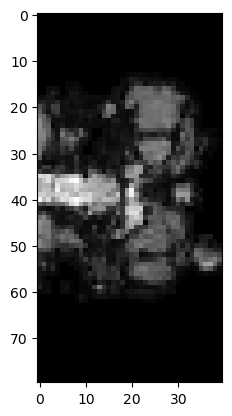

In [56]:
import nibabel as nib
import matplotlib.pyplot as plt

filename = workingdir + os.sep + reoriented_file
print(filename)

# load the image
img = nib.load(filename)

# get the data
data = img.get_fdata()

# Display a slice
plt.imshow(data[:,:,40,0], cmap='gray')


In [89]:
import shutil

runs_possible = range(1,7)

dataset = 'Complex'
session = ''
specie = 'H'
task = 'visual'

if specie == 'H':
    sublist = ['Raul','Laura','Juan','Miriam','Paula','Cecilia','Lili','Rita','Eszter','Yago','Andrea','John','Eniko']
elif specie == 'D':
    sublist = ['Odin','Kun','Maya','Maverick','Mokka','Alma','Akira','Pan','Monty','Kara','Bodza','Grog','Bingo','Rohan','Nara']


for sub_N,participant in enumerate(sublist):
    if participant == 'Maverick':
        runs_possible = range(1,4)
    elif participant == 'Grog':
        runs_possible = range(1,4)
    else:
        runs_possible = range(1,7)
    for run_N in runs_possible:
        original_name = os.getcwd() + os.sep + participant + '_' + 'run' + str(run_N) + '.nii.gz'

        # input directory in BIDS format
        filename = datafolder + os.sep + dataset + os.sep + specie + '-sub-' + str(sub_N+1).zfill(3) + os.sep + 'func' + os.sep
        # check if session is not empty
        if session != '':
            filename += 'ses-' + session + os.sep
        filename += specie + '-sub-' + str(sub_N+1).zfill(3)
        if session != '':
            filename += '_ses-' + session
        filename += '_task-' + task + '_run-' + str(run_N).zfill(2) + '_bold.nii.gz'
        # check if folder related to filename exist
        if not os.path.exists(os.path.dirname(filename)):
            os.makedirs(os.path.dirname(filename))

        print('old name:' + original_name)
        print('new name:' + filename)
        # create a copy of filename to new location
        shutil.copy(original_name, filename)


    


In [ ]:
dataset = 'Complex'
session = ''
task = 'visual'
specie= 'D'
sub_N = 1
runs_to_use = [1,2,3,4]
sub_list = [1,2,3,4,5]
file_type_list = []
# check if the system is windows
if os.name == 'nt':
    datafolder = r"C:\data"
    datafolder = r"P:\userdata\raulh87\data"
else:
    datafolder = '/home/raulh87/mnt/a471/userdata/raulh87/data'

# Create dataframe status_table which indicates if the file is present or not
#status_table = pd.DataFrame(index=sub_list, columns=runs_to_use)




# initial files



'''
#P:\userdata\raulh87\data\Complex\BIDS\D-sub-001\func
'''






# working directories
std_dir = datafolder + os.sep + dataset + os.sep + 'normalized' + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
preprocess_dir = datafolder + os.sep + dataset + os.sep + 'preprocessing' + os.sep + specie + '-sub-' + str(sub_N).zfill(3)

# cutting parameters file
params_file = preprocess_dir + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
# adding session if there is one
if session != '':
    params_file += '_ses-' + session

params_file += '_task-' + task + '_mean_fct_cut_params.txt'

# if working directory does not exist, create it
if not os.path.exists(std_dir):
    os.makedirs(std_dir)
    print('Directory ' + std_dir + ' created')
else:
    print('Directory ' + std_dir + ' already exists')



In [ ]:

dataset = 'Complex'
session = ''
task = 'visual'
specie= 'D'
sub_N = 1
runs_to_use = [1,2,3,4]


# working directories
std_dir = datafolder + os.sep + dataset + os.sep + 'normalized' + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
preprocess_dir = datafolder + os.sep + dataset + os.sep + 'preprocessing' + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
